In [2]:
from data.particle_clouds.jets import JetDataModule
from pipeline.configs import ExperimentConfigs

config = ExperimentConfigs('config.yaml')
raw_jets = JetDataModule(config, preprocess=False)
jets = JetDataModule(config)


In [3]:
raw_jets.setup('fit')
jets.setup('fit')

INFO:  Setting up datasets for training...
INFO:  Setting up datasets for training...
INFO:  Preprocessing source/target fit datasets...


/home/df630/Multimodal-Bridges/multimodal_bridges/data/particle_clouds/particles.py:133: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.continuous = (self.continuous - torch.tensor(mean)) / (
/home/df630/Multimodal-Bridges/multimodal_bridges/data/particle_clouds/particles.py:134: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(std)


In [36]:

def get_flavor_counts(tensor):
    mask = tensor.mask_bool
    jet_flavors = tensor.discrete[mask]
    for i in range(8):
        print(i, len(jet_flavors[jet_flavors==i]))

get_flavor_counts(jets.target)


0 154312
1 38183
2 142701
3 146611
4 665
5 742
6 471
7 542


In [40]:
def get_one_hot_flavor_counts(tensor):
    isPhoton = (tensor.discrete[..., 0] == 1) & (tensor.discrete[..., -1] == 0) 
    isNeutralHadron = (tensor.discrete[..., 1] == 1) & (tensor.discrete[..., -1] == 0) 
    isNegativeHadron = (tensor.discrete[..., 2] == 1) & (tensor.discrete[..., -1] == -1) 
    isPositiveHadron = (tensor.discrete[..., 2] == 1) & (tensor.discrete[..., -1] == 1) 
    isElectron = (tensor.discrete[..., 3] == 1) & (tensor.discrete[..., -1] == -1) 
    isPositron = (tensor.discrete[..., 3] == 1) & (tensor.discrete[..., -1] == 1) 
    isMuon = (tensor.discrete[..., 4] == 1) & (tensor.discrete[..., -1] == -1) 
    isAntiMuon = (tensor.discrete[..., 4] == 1) & (tensor.discrete[..., -1] == 1) 

    flavors = {0:isPhoton, 1:isNeutralHadron, 2:isNegativeHadron, 3:isPositiveHadron, 4:isElectron, 5:isPositron, 6:isMuon, 7:isAntiMuon}

    for i in range(8):
        print(i, tensor.discrete[flavors[i]].shape[0])

get_one_hot_flavor_counts(raw_jets.target)

0 154307
1 38186
2 142701
3 146613
4 665
5 742
6 471
7 542


<Axes: ylabel='Count'>

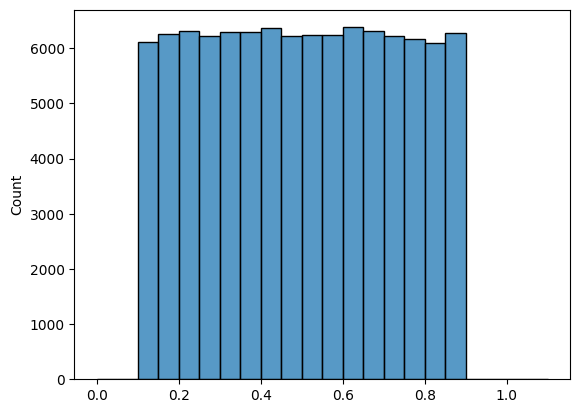

In [56]:
from torch.distributions.uniform import Uniform
import seaborn as sns
low =0.1 #range of uniform distribution

x = Uniform(low, 1- low).sample((100000,))
sns.histplot(x, fill=True, binwidth=0.05, binrange=(low-0.1, high+0.1))


In [55]:
x

tensor([0.7417, 0.7380, 0.7873,  ..., 0.6568, 0.8176, 0.6528])